# Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Functions

In [2]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

dslabs_functions lodaded


In [25]:

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'dataset/df_ecom_pre_proc_vcleaned.csv'

file_tag = 'df_ecom_pre_proc'

# Load

In [ ]:
## Get sample from dataset 

In [26]:
test_data = False
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)

# Display the first 100 rows of the DataFrame


df.head(20)


,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day,brand_value,brand_category,product_category
0,electronics,electronics/smartphone,202.50,0,5.0,3,weekday,Friday,15,12,30,afternoon,173.5,electronics_xiaomi,electronics/smartphone_1005159
1,NaN,NaN,334.37,0,0.0,3,weekend,Saturday,16,12,6,afternoon,NaN,NaN,unknown_15700019
2,electronics,electronics/smartphone,952.15,1,2.0,5,weekday,Friday,29,4,1,night,779.2,electronics_apple,electronics/smartphone_1004227
3,appliances,appliances/kitchen,347.47,0,9.0,3,weekend,Saturday,16,16,53,afternoon,282.5,appliances_samsung,appliances/kitchen_3601250
4,electronics,electronics/smartphone,202.06,0,2.0,3,weekend,Sunday,17,13,13,afternoon,173.5,electronics_xiaomi,electronics/smartphone_1005160
5,electronics,electronics/smartphone,151.35,0,6.0,2,weekday,Monday,11,7,26,morning,173.5,electronics_xiaomi,electronics/smartphone_1005217
6,electronics,electronics/smartphone,561.66,0,4.0,3,weekend,Sunday,17,12,28,afternoon,779.2,electronics_apple,electronics/smartphone_1002524
7,electronics,electronics/smartphone,334.37,0,13.0,3,weekday,Friday,15,17,47,afternoon,282.5,electronics_samsung,electronics/smartphone_1004433
8,electronics,electronics/audio,165.84,0,2.0,3,weekday,Wednesday,20,10,42,morning,779.2,electronics_apple,electronics/audio_4804056
9,NaN,NaN,43.50,0,0.0,3,weekend,Saturday,16,8,28,morning,51.4,appliances_ballu,unknown_4300279


In [27]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
category_code_lvl_1       13
category_code_lvl_2       60
price                  24884
is_purchase                2
activity_in_session      120
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                4
brand_value             1661
brand_category          3012
product_category       60657
dtype: int64


# Data Profiling

## Dimensionality

### Number of records and variables

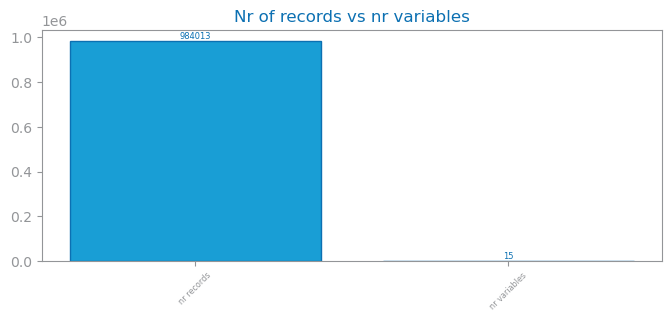

In [28]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(8, 3))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
#savefig(f"images/{file_tag}_records_variables.png")
show()

### Missing values

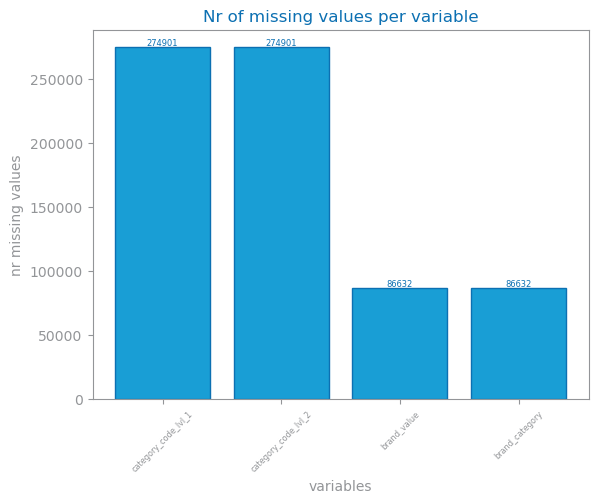

In [29]:

mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()

    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
#savefig(f"images/{file_tag}_mv.png")
show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983745 entries, 0 to 983744
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   product_id           983745 non-null  int64   
 1   category_id          983745 non-null  int64   
 2   category_code_lvl_1  709157 non-null  category
 3   category_code_lvl_2  709157 non-null  category
 4   brand                897175 non-null  category
 5   price                983745 non-null  float64 
 6   is_purchase          983745 non-null  int64   
 7   activity_in_session  983745 non-null  float64 
 8   week_of_month        983745 non-null  int64   
 9   is_weekend           983745 non-null  object  
 10  day_of_week          983745 non-null  category
 11  day                  983745 non-null  int64   
 12  hour                 983745 non-null  int64   
 13  min                  983745 non-null  int64   
 14  time_of_day          983745 non-null  category
dtype

### Variables Type

In [48]:
df.dtypes

product_id                int64
category_id               int64
category_code_lvl_1    category
category_code_lvl_2    category
brand                  category
price                   float64
is_purchase               int64
activity_in_session     float64
week_of_month             int64
is_weekend               object
day_of_week            category
day                       int64
hour                      int64
min                       int64
time_of_day            category
dtype: object

In [30]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
            variable_types["binary"].append(c)
        else:
            if df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                try:
                    df[c] = to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)

{'numeric': ['price', 'activity_in_session', 'week_of_month', 'day', 'hour', 'min', 'brand_value'], 'binary': ['is_purchase', 'is_weekend'], 'date': [], 'symbolic': ['category_code_lvl_1', 'category_code_lvl_2', 'day_of_week', 'time_of_day', 'brand_category', 'product_category']}


#### Change symbolic columns type, to category (instead of object)

In [7]:
symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))
df.dtypes

category_code_lvl_1    category
category_code_lvl_2    category
price                   float64
is_purchase               int64
activity_in_session     float64
week_of_month             int64
is_weekend               object
day_of_week            category
day                       int64
hour                      int64
min                       int64
time_of_day            category
brand_value             float64
brand_category         category
product_category       category
dtype: object

## Distribuition

In [8]:

summary5: df = df.describe(include="all")
summary5

,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day,brand_value,brand_category,product_category
count,709112,709112,984013.000000,984013.000000,984013.000000,984013.000000,984013,984013,984013.000000,984013.000000,984013.000000,984013,897381.000000,897381,984013
unique,13,60,NaN,NaN,NaN,NaN,2,7,NaN,NaN,NaN,4,NaN,3012,60657
top,electronics,electronics/smartphone,NaN,NaN,NaN,NaN,weekday,Friday,NaN,NaN,NaN,morning,NaN,electronics_samsung,electronics/smartphone_1004856
freq,486609,367929,NaN,NaN,NaN,NaN,587207,240225,NaN,NaN,NaN,424650,NaN,169407,25449
mean,NaN,NaN,290.342350,0.149937,3.558758,2.985842,NaN,NaN,17.121542,10.683720,29.604557,NaN,304.459598,NaN,NaN
std,NaN,NaN,338.027142,0.357010,5.437556,0.884761,NaN,NaN,6.079035,5.198035,17.210019,NaN,249.995785,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.900000,NaN,NaN
25%,NaN,NaN,71.040000,0.000000,0.000000,3.000000,NaN,NaN,15.000000,6.000000,15.000000,NaN,117.200000,NaN,NaN
50%,NaN,NaN,167.310000,0.000000,2.000000,3.000000,NaN,NaN,16.000000,10.000000,30.000000,NaN,240.200000,NaN,NaN
75%,NaN,NaN,350.050000,0.000000,5.000000,3.000000,NaN,NaN,20.000000,15.000000,44.000000,NaN,348.400000,NaN,NaN


In [31]:

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Debug: Verificar os tipos de variáveis
print("Tipos de variáveis:", variables_types)

Tipos de variáveis: {'numeric': ['price', 'activity_in_session', 'week_of_month', 'day', 'hour', 'min', 'brand_value'], 'binary': ['is_purchase', 'is_weekend'], 'date': [], 'symbolic': ['category_code_lvl_1', 'category_code_lvl_2', 'day_of_week', 'time_of_day', 'brand_category', 'product_category']}


### Numeric Values

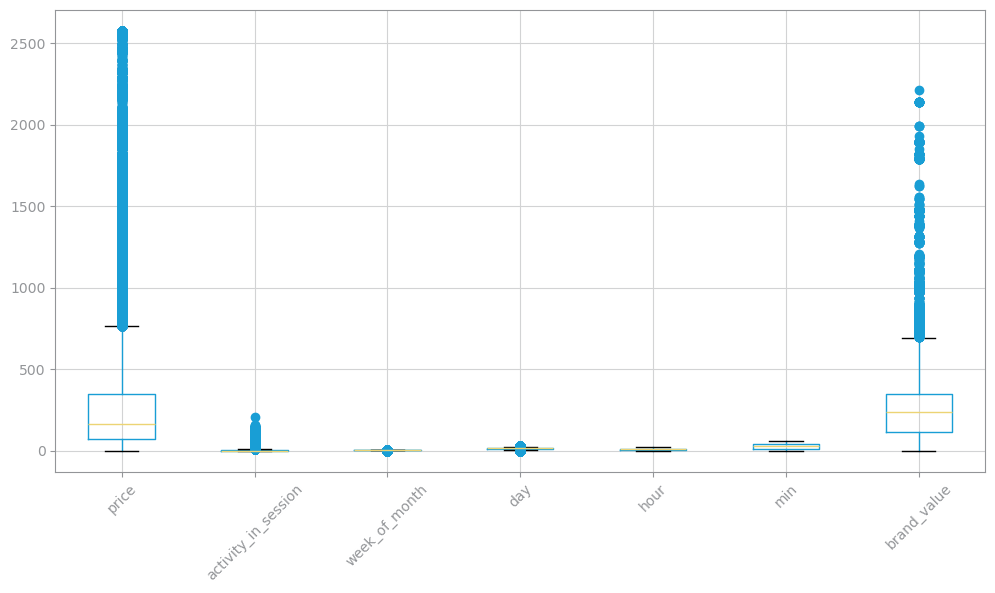

In [32]:
from matplotlib.pyplot import savefig, show

variables_types_numeric: dict[str, list] = get_variable_types(df)

numeric: list[str] = variables_types_numeric["numeric"]
if [] != numeric: #verifica que a lista numeric não está vazia ([]). Se não estiver executa o codigo em baixo
    plt.figure(figsize=(12, 6))  # Aumentar o tamanho da figura
    df[numeric].boxplot(rot=45)

    #savefig(f"images/{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

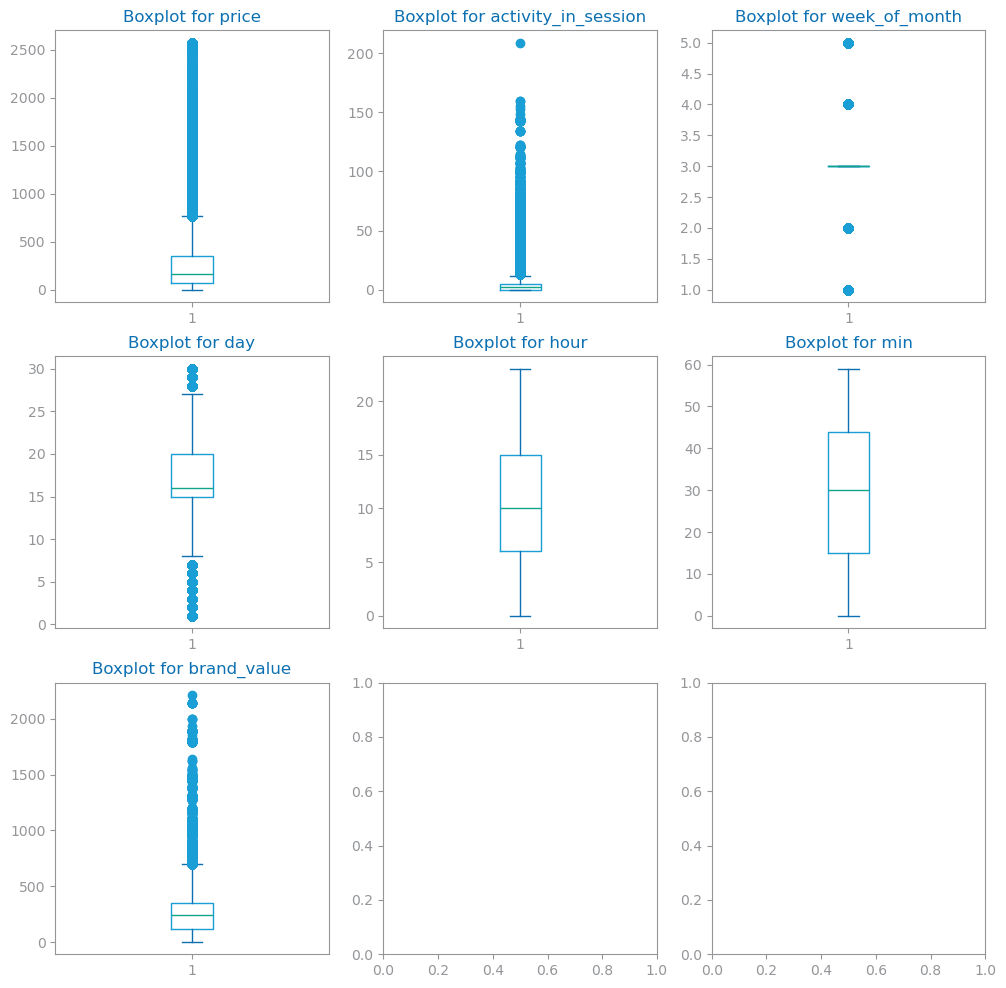

In [33]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT
import pandas as pd

# Obter as variáveis categorizadas pela função get_variable_types
variable_types: dict[str, list] = get_variable_types(df)

# Apenas variáveis numéricas são usadas para os boxplots
numeric = variable_types.get('numeric', [])

# Verificar se a lista de variáveis numéricas não está vazia
if numeric:
    rows, cols = define_grid(len(numeric))  # Definir o número de linhas e colunas com base no número de variáveis
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)

    # Iterar sobre as variáveis numéricas e criar os subplots
    i, j = 0, 0
    for n in numeric:
        # Garantir que apenas valores numéricos são passados para boxplot
        data = df[n].dropna().values
        
        if pd.api.types.is_numeric_dtype(df[n]):
            axs[i, j].set_title(f"Boxplot for {n}")
            axs[i, j].boxplot(data)
        
        # Mover para o próximo subplot
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)
    
    # Mostrar os gráficos
    show()
else:
    print("There are no numeric variables.")


In [ ]:
##Get insights

#### Checking outliers

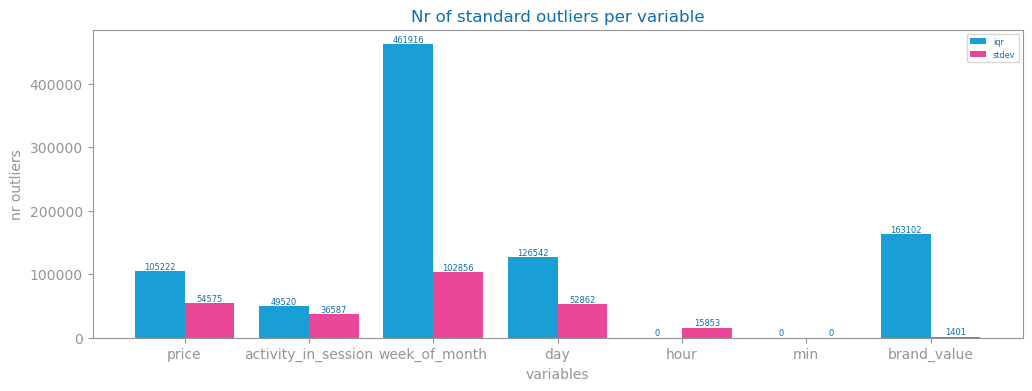

In [34]:
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

#This is the number of times * Standartdeviation.  
#Outliers are defined as values that are a certain distance from the mean, determined by the number of standard deviations you specified
#the higher the nr_stdev_ less outliers ww will have
NR_STDEV: int = 2


IQR_FACTOR: float = 1.5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom



def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = df[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}


if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    #savefig(f"images/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

In [25]:
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
from dslabs_functions import plot_multiline_chart


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = norm.fit(x_values)
    distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = expon.fit(x_values)
    distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = lognorm.fit(x_values)
    distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
        x_values, sigma, loc, scale
    )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    ax.hist(values, 20, density=True)
    distributions: dict = compute_known_distributions(values)
    plot_multiline_chart(
        values,
        distributions,
        ax=ax,
        title="Best fit for %s" % var,
        xlabel=var,
        ylabel="",
    )


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], df[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")

KeyboardInterrupt: 

#### histogram for distribuition

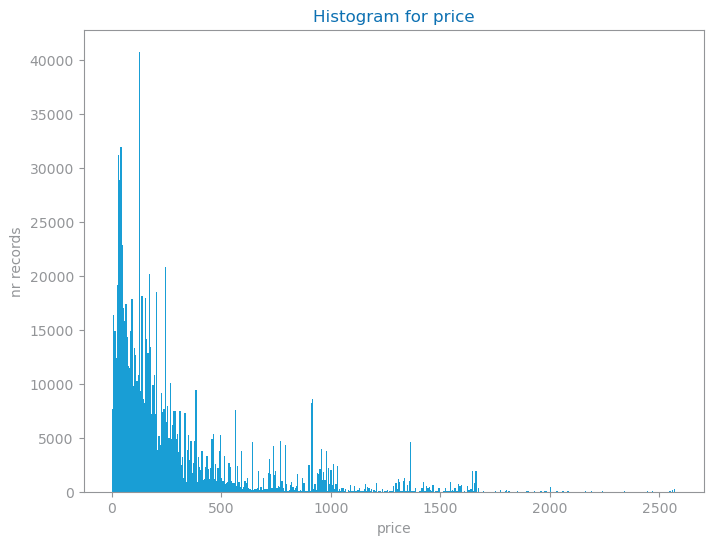

In [13]:
from dslabs_functions import set_chart_labels
import matplotlib.pyplot as plt

# Certificar-se de que a coluna 'price' está em formato numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Verificar se a coluna 'price' existe no DataFrame e se é numérica
if 'price' in df.columns and df['price'].dtype in ['float64', 'int64']:
    fig, ax = plt.subplots(figsize=(8, 6))  # Tamanho do gráfico

    # Definir os rótulos do gráfico
    set_chart_labels(
        ax,
        title="Histogram for price",
        xlabel="price",
        ylabel="nr records"
    )
    
    # Gerar o histograma para a coluna 'price'
    ax.hist(df['price'].dropna().values, bins='auto')
    
    # Exibir o gráfico
    plt.show()
else:
    print("A coluna 'price' não está disponível ou não é numérica.")

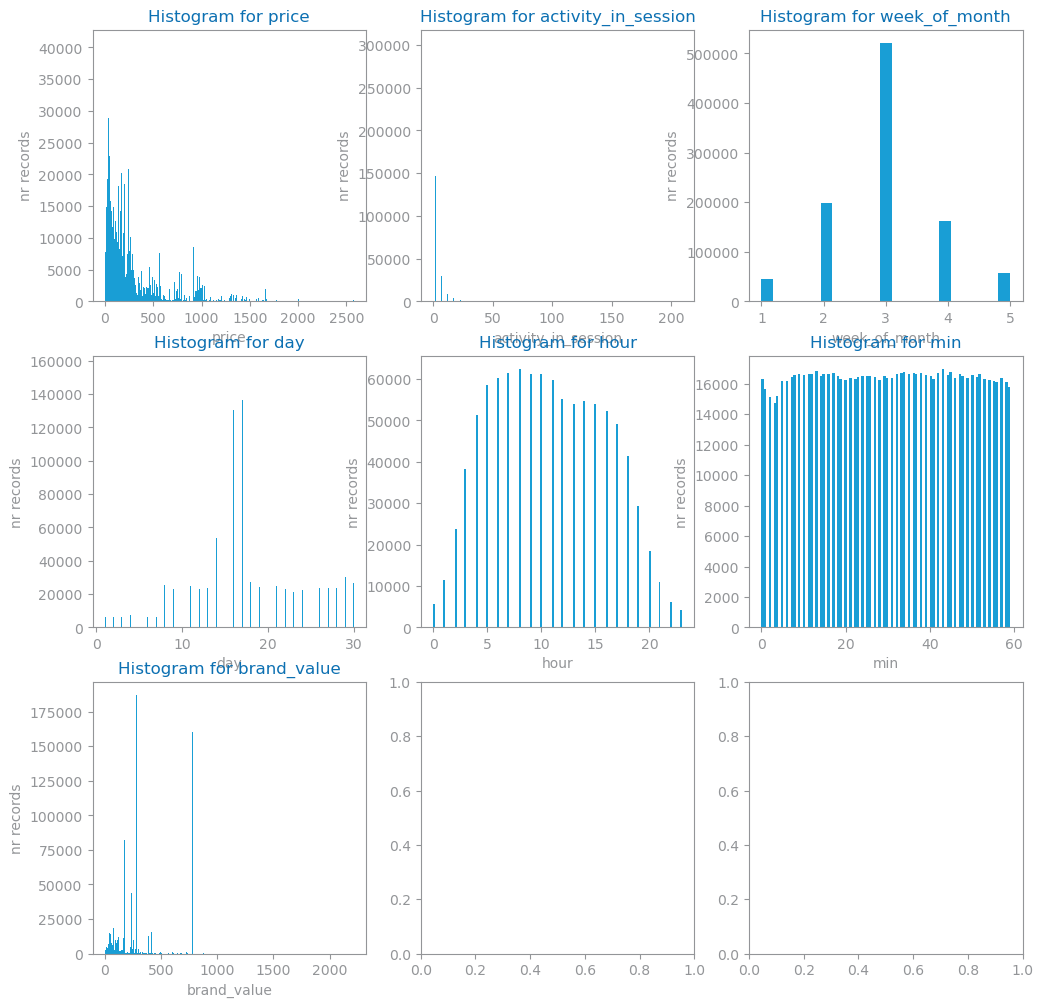

In [18]:
from dslabs_functions import set_chart_labels
from matplotlib.pyplot import subplots, show  # Ensure you have these imports

# Assuming numeric is a list of numeric variable names
# Exclude 'product_id' and 'category_id' from the numeric list
filtered_numeric = [var for var in numeric if var not in ['product_id', 'category_id']]

if filtered_numeric:
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
    i, j = 0, 0
    for n in range(len(filtered_numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {filtered_numeric[n]}",
            xlabel=filtered_numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(df[filtered_numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    # savefig(f"images/{file_tag}_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")


In [25]:
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
from dslabs_functions import plot_multiline_chart


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = norm.fit(x_values)
    distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = expon.fit(x_values)
    distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = lognorm.fit(x_values)
    distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
        x_values, sigma, loc, scale
    )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    ax.hist(values, 20, density=True)
    distributions: dict = compute_known_distributions(values)
    plot_multiline_chart(
        values,
        distributions,
        ax=ax,
        title="Best fit for %s" % var,
        xlabel=var,
        ylabel="",
    )


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], df[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")

KeyboardInterrupt: 

### Symbolic variables

#### Histogram for distribuition of variables

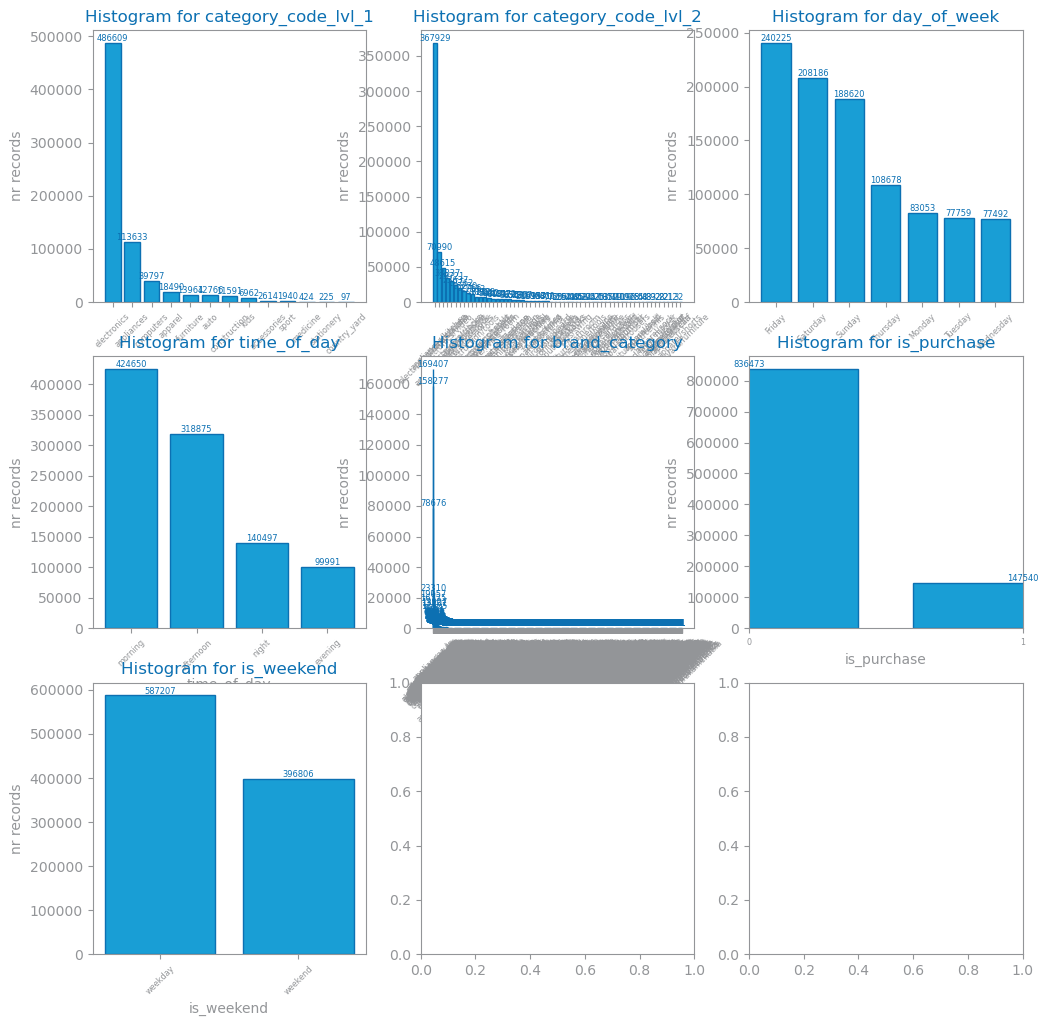

In [35]:
from dslabs_functions import plot_bar_chart
from pandas import Series

# Supondo que você tenha criado a coluna 'category_product' anteriormente

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Criar a lista de variáveis simbólicas, excluindo 'category_product'
symbolic: list[str] = [var for var in variables_types["symbolic"] if var != 'product_category'] + variables_types["binary"]

if symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = df[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")


In [36]:
# Verifica se a coluna 'day' existe no DataFrame
if 'day' in df.columns:
    # Conta o número de dias únicos na coluna 'day'
    unique_days = df['day'].nunique()
    print(f"Número de dias únicos no dataset: {unique_days}")
else:
    print("A coluna 'day' não existe no DataFrame.")


Número de dias únicos no dataset: 30


##### var Brand ?? To many values

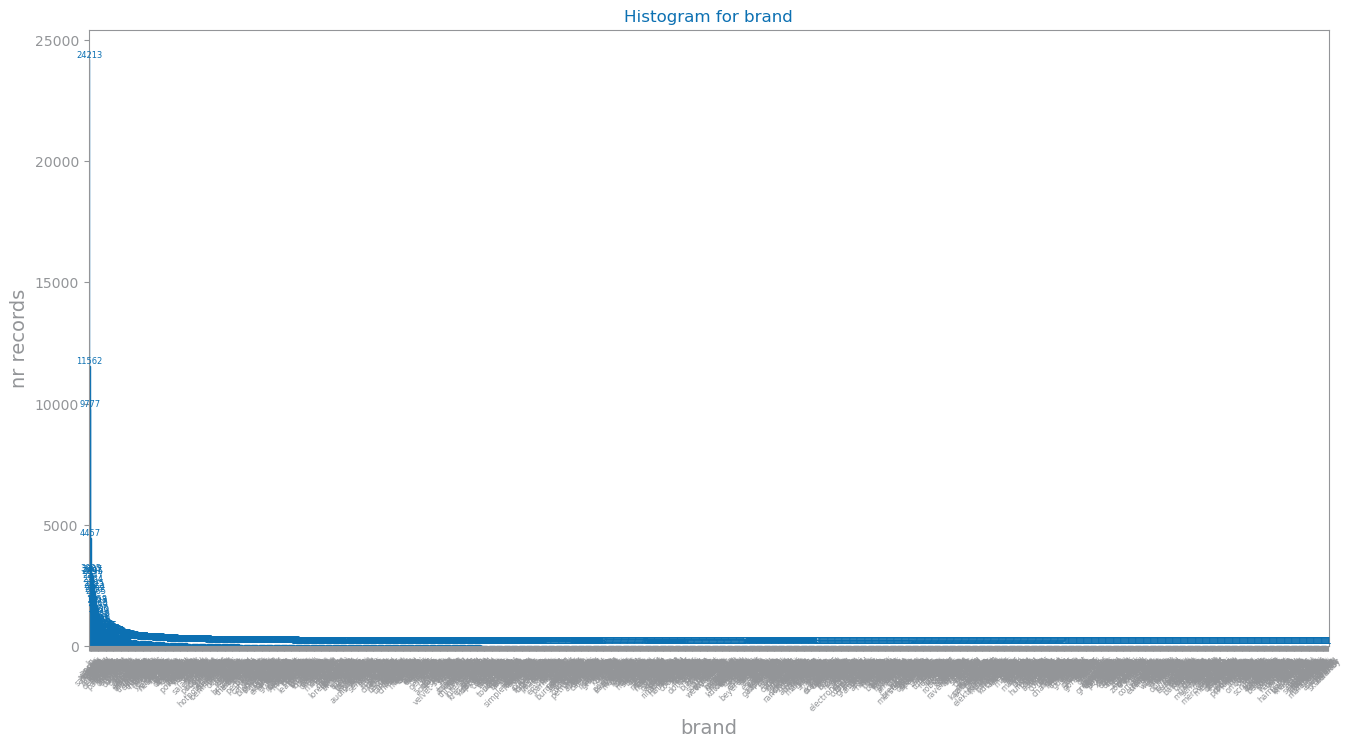

In [44]:
from dslabs_functions import plot_bar_chart
from matplotlib.pyplot import subplots, show
from pandas import Series

# Obtém os tipos de variáveis do DataFrame
variables_types: dict[str, list] = get_variable_types(df)

# Foca apenas na variável simbólica 'brand'
symbolic: list[str] = variables_types["symbolic"]

# Verifica se a variável 'brand' existe na lista de variáveis simbólicas
if "brand" in symbolic:
    counts: Series = df["brand"].value_counts()  # Conta os valores para a variável

    # Define a grade para o gráfico (apenas um gráfico)
    rows, cols = 1, 1  # Uma linha, uma coluna
    fig, axs = subplots(rows, cols, figsize=(16, 8), squeeze=False)  # Aumentar o tamanho do gráfico

    # Plota o histograma para 'brand'
    plot_bar_chart(
        counts.index.to_list(),
        counts.to_list(),
        ax=axs[0, 0],
        title="Histogram for brand",
        xlabel="brand",
        ylabel="nr records",
        percentage=False,
    )

    # Rotaciona os rótulos do eixo x para melhor legibilidade
    axs[0, 0].tick_params(axis='x', rotation=45)  # Rotacionar os rótulos

    # Ajustar o tamanho da fonte
    axs[0, 0].set_xlabel("brand", fontsize=14)  # Aumentar tamanho da fonte
    axs[0, 0].set_ylabel("nr records", fontsize=14)

    # Ajustar limites do eixo x, se necessário, para mostrar todos os bins
    axs[0, 0].set_xlim(-1, len(counts.index))  # Ajuste baseado no número de categorias

    # Exibe o gráfico
    show()
else:
    print("A variável 'brand' não existe entre as variáveis simbólicas.")


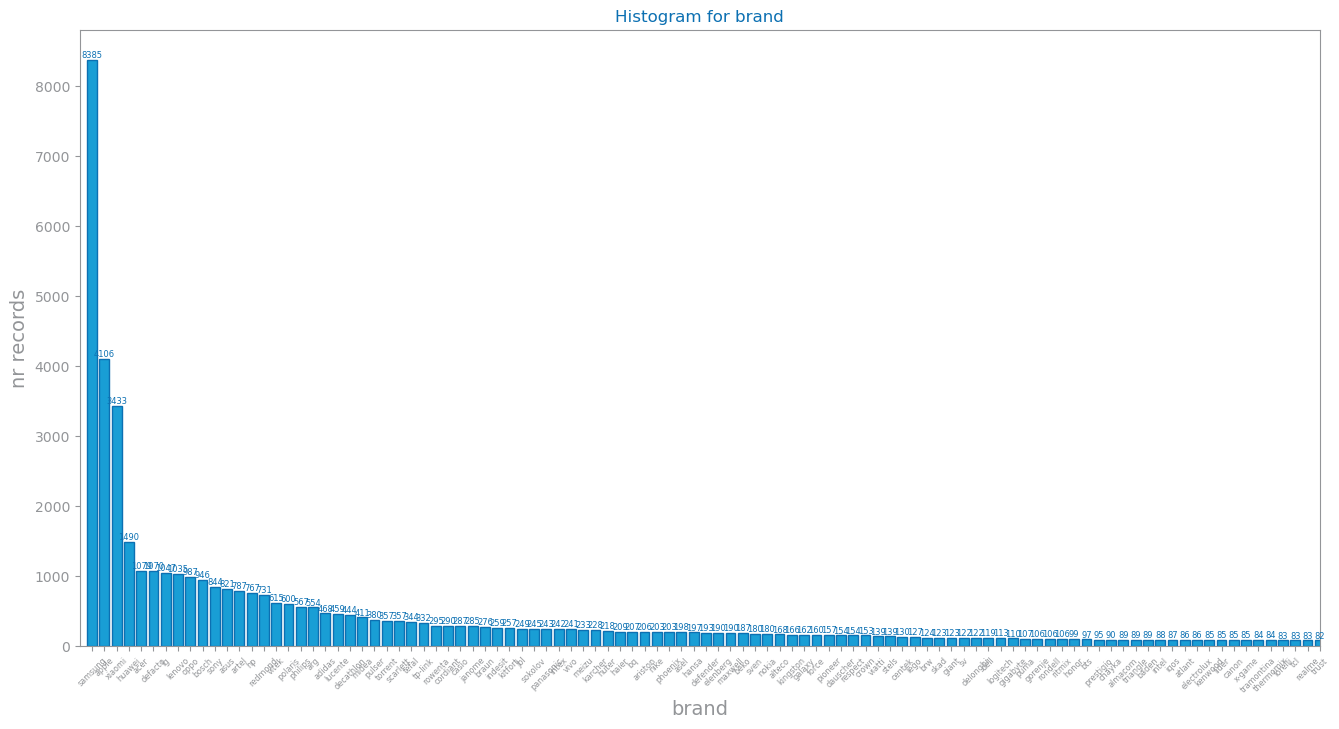

In [105]:
from dslabs_functions import plot_bar_chart
from matplotlib.pyplot import subplots, show
from pandas import Series

# Obtém os tipos de variáveis do DataFrame
variables_types: dict[str, list] = get_variable_types(df)

# Foca apenas na variável simbólica 'brand'
symbolic: list[str] = variables_types["symbolic"]

# Verifica se a variável 'brand' existe na lista de variáveis simbólicas
if "brand" in symbolic:
    counts: Series = df["brand"].value_counts()  # Conta os valores para a variável

    # Define a grade para o gráfico (apenas um gráfico)
    rows, cols = 1, 1  # Uma linha, uma coluna
    fig, axs = subplots(rows, cols, figsize=(16, 8), squeeze=False)  # Aumentar o tamanho do gráfico

    # Plota o histograma para 'brand'
    plot_bar_chart(
        counts.index.to_list(),
        counts.to_list(),
        ax=axs[0, 0],
        title="Histogram for brand",
        xlabel="brand",
        ylabel="nr records",
        percentage=False,
    )

    # Rotaciona os rótulos do eixo x para melhor legibilidade
    axs[0, 0].tick_params(axis='x', rotation=45)  # Rotacionar os rótulos

    # Ajustar o tamanho da fonte
    axs[0, 0].set_xlabel("brand", fontsize=14)  # Aumentar tamanho da fonte
    axs[0, 0].set_ylabel("nr records", fontsize=14)

    # Ajustar limites do eixo x, se necessário, para mostrar todos os bins
    axs[0, 0].set_xlim(-1, 100)  # Ajuste baseado no número de categorias

    # Exibe o gráfico
    show()
else:
    print("A variável 'brand' não existe entre as variáveis simbólicas.")

##### var category_code_lvl_1  ?? To many values

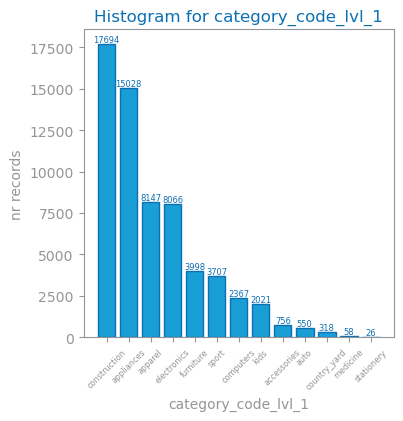

In [106]:
from dslabs_functions import plot_bar_chart
from matplotlib.pyplot import subplots, show  # Certifique-se de que as bibliotecas necessárias estão importadas
from pandas import Series  # Importando Series para a tipagem

# Obtém os tipos de variáveis do DataFrame
variables_types: dict[str, list] = get_variable_types(df)

# Foca apenas na variável simbólica 'brand'
symbolic: list[str] = variables_types["symbolic"]

# Verifica se a variável 'brand' existe na lista de variáveis simbólicas
if "category_code_lvl_1" in symbolic:
    counts: Series = df["category_code_lvl_1"].value_counts()  # Conta os valores para a variável 'brand'

    # Define a grade para o gráfico (apenas um gráfico)
    rows, cols = 1, 1  # Uma linha, uma coluna
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)

    # Plota o histograma para 'brand'
    plot_bar_chart(
        counts.index.to_list(),
        counts.to_list(),
        ax=axs[0, 0],
        title="Histogram for category_code_lvl_1",
        xlabel="category_code_lvl_1",
        ylabel="nr records",
        percentage=False,
    )
    
    # Exibe o gráfico
    show()
else:
    print("A variável 'category_code_level_1' não existe entre as variáveis simbólicas.")


##### var category_code_lvl_2  ?? To many values

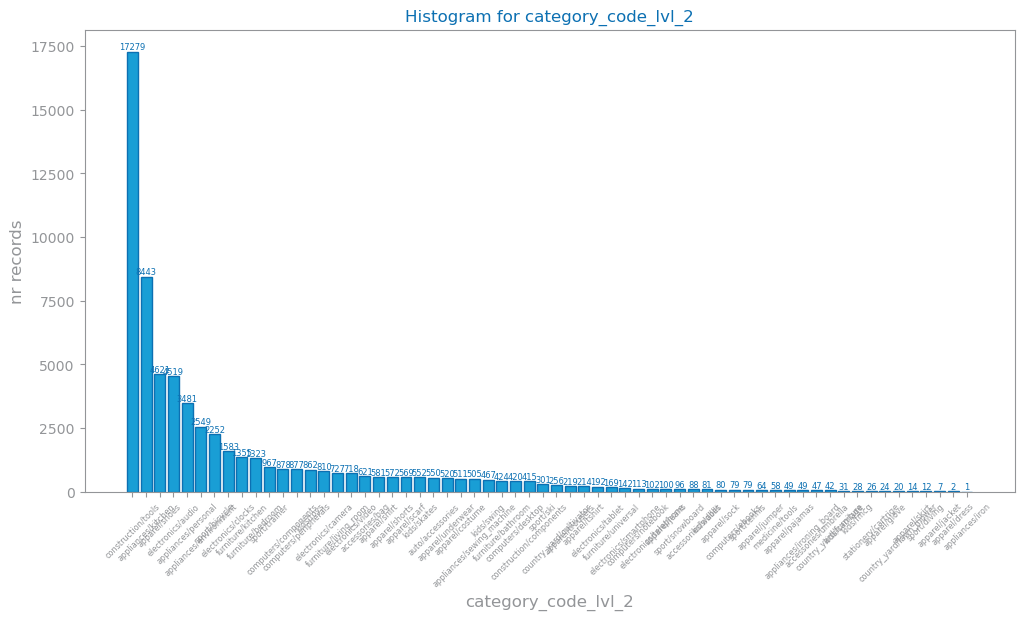

In [107]:
from dslabs_functions import plot_bar_chart
from matplotlib.pyplot import subplots, show
from pandas import Series

# Obtém os tipos de variáveis do DataFrame
variables_types: dict[str, list] = get_variable_types(df)

# Foca apenas na variável simbólica 'category_code_lvl_2'
symbolic: list[str] = variables_types["symbolic"]

# Verifica se a variável 'category_code_lvl_2' existe na lista de variáveis simbólicas
if "category_code_lvl_2" in symbolic:
    counts: Series = df["category_code_lvl_2"].value_counts()  # Conta os valores para a variável

    # Define a grade para o gráfico (apenas um gráfico)
    rows, cols = 1, 1  # Uma linha, uma coluna
    fig, axs = subplots(rows, cols, figsize=(12, 6), squeeze=False)  # Aumentar o tamanho do gráfico

    # Plota o histograma para 'category_code_lvl_2'
    plot_bar_chart(
        counts.index.to_list(),
        counts.to_list(),
        ax=axs[0, 0],
        title="Histogram for category_code_lvl_2",
        xlabel="category_code_lvl_2",
        ylabel="nr records",
        percentage=False,
    )

    # Rotaciona os rótulos do eixo x para melhor legibilidade
    axs[0, 0].tick_params(axis='x', rotation=45)  # Rotacionar os rótulos

    # Ajustar o tamanho da fonte
    axs[0, 0].set_xlabel("category_code_lvl_2", fontsize=12)  # Aumentar tamanho da fonte
    axs[0, 0].set_ylabel("nr records", fontsize=12)

    # Exibe o gráfico
    show()
else:
    print("A variável 'category_code_lvl_2' não existe entre as variáveis simbólicas.")


##### var category_code_lvl_3  ?? To many values

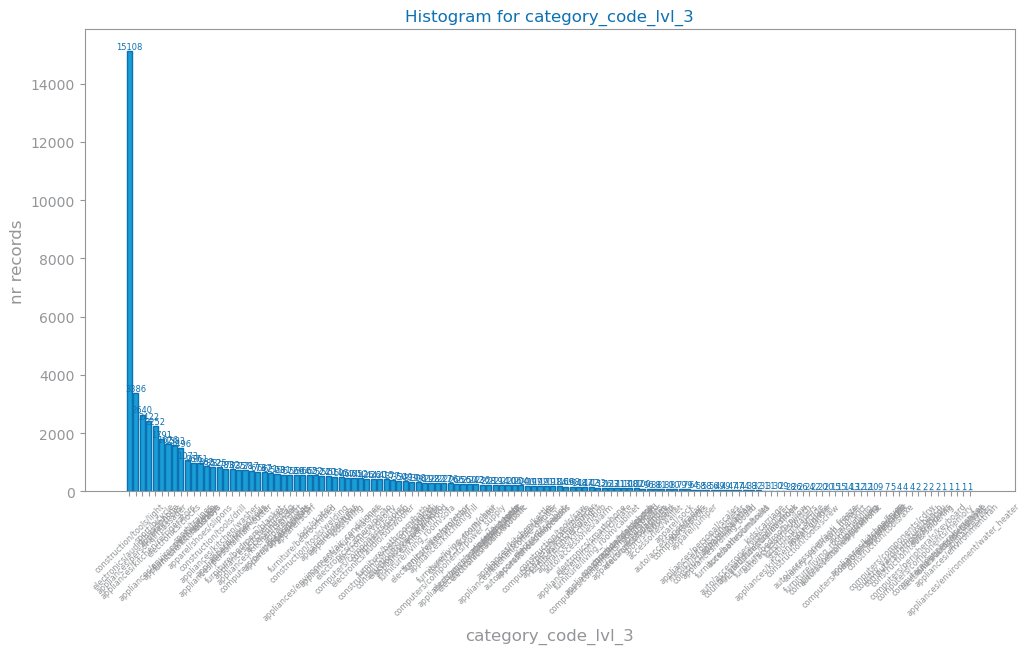

In [38]:
from dslabs_functions import plot_bar_chart
from matplotlib.pyplot import subplots, show
from pandas import Series

# Obtém os tipos de variáveis do DataFrame
variables_types: dict[str, list] = get_variable_types(df)

# Foca apenas na variável simbólica 'category_code_lvl_2'
symbolic: list[str] = variables_types["symbolic"]

# Verifica se a variável 'category_code_lvl_2' existe na lista de variáveis simbólicas
if "category_code_lvl_3" in symbolic:
    counts: Series = df["category_code_lvl_3"].value_counts()  # Conta os valores para a variável

    # Define a grade para o gráfico (apenas um gráfico)
    rows, cols = 1, 1  # Uma linha, uma coluna
    fig, axs = subplots(rows, cols, figsize=(12, 6), squeeze=False)  # Aumentar o tamanho do gráfico

    # Plota o histograma para 'category_code_lvl_2'
    plot_bar_chart(
        counts.index.to_list(),
        counts.to_list(),
        ax=axs[0, 0],
        title="Histogram for category_code_lvl_3",
        xlabel="category_code_lvl_3",
        ylabel="nr records",
        percentage=False,
    )

    # Rotaciona os rótulos do eixo x para melhor legibilidade
    axs[0, 0].tick_params(axis='x', rotation=45)  # Rotacionar os rótulos

    # Ajustar o tamanho da fonte
    axs[0, 0].set_xlabel("category_code_lvl_3", fontsize=12)  # Aumentar tamanho da fonte
    axs[0, 0].set_ylabel("nr records", fontsize=12)

    # Exibe o gráfico
    show()
else:
    print("A variável 'category_code_lvl_2' não existe entre as variáveis simbólicas.")

In [108]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
event_type                 3
category_code_lvl_1       13
category_code_lvl_2       62
category_code_lvl_3      132
brand                   2021
price                  13403
conversion                 2
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                3
dtype: int64


### Balancing and Class distribution


is_purchase
0    836473
1    147540
Name: count, dtype: int64


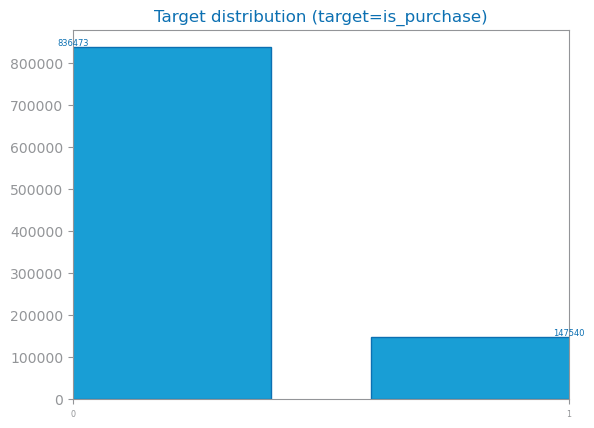

In [37]:
from matplotlib.pyplot import savefig, show
target = "is_purchase"

values: Series = df[target].value_counts()
print(values)

Figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
#savefig(f"images/{file_tag}_class_distribution.png")
show()

In [38]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
category_code_lvl_1       13
category_code_lvl_2       60
price                  24884
is_purchase                2
activity_in_session      120
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                4
brand_value             1661
brand_category          3012
product_category       60657
dtype: int64


In [27]:
df.shape[0]

983567

## Granularity

In [53]:
def derive_date_variables(df: DataFrame, date_vars: list[str]) -> DataFrame:
    for date in date_vars:
        df[date + "_year"] = df[date].dt.year
        df[date + "_quarter"] = df[date].dt.quarter
        df[date + "_month"] = df[date].dt.month
        df[date + "_day"] = df[date].dt.day
    return df

In [54]:
print(df.dtypes)


event_time             datetime64[ns, UTC]
event_type                        category
brand                             category
price                              float64
category_code_lvl_1               category
category_code_lvl_2               category
category_code_lvl_3               category
conversion                          object
dtype: object


In [55]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        try:
            if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
                variable_types["binary"].append(c)
            elif df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                # Tenta converter para numérico
                df[c] = to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
        except (ValueError, TypeError):
            try:
                # Tenta converter para datetime
                df[c] = to_datetime(df[c], errors="raise")
                variable_types["date"].append(c)
            except (ValueError, TypeError):
                variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)


{'numeric': ['price'], 'binary': ['conversion'], 'date': ['event_time'], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3']}


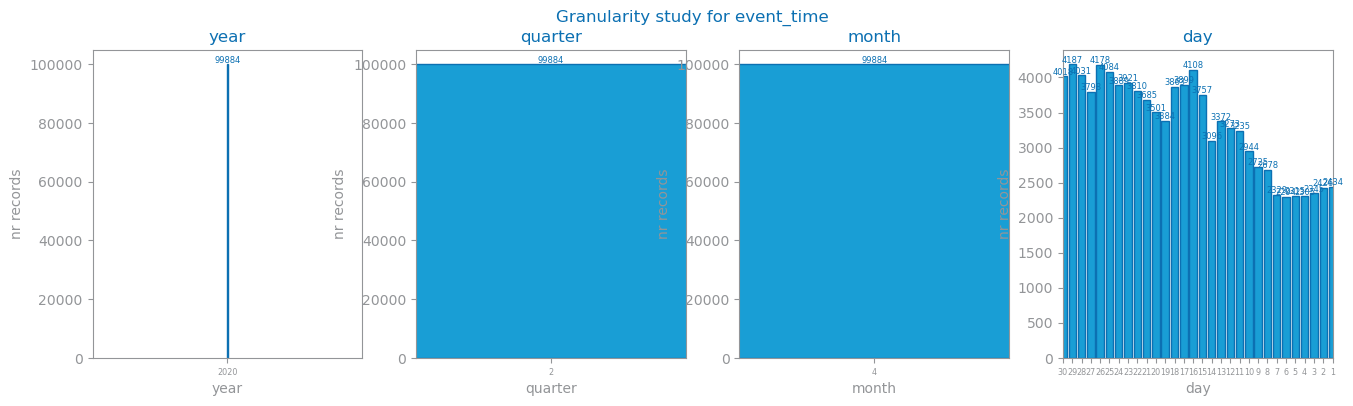

In [56]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
from dslabs_functions import plot_bar_chart, HEIGHT


def analyse_date_granularity(data: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for {var}")

    for i in range(cols):
        counts: Series[int] = data[var + "_" + levels[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs

variables_types: dict[str, list] = get_variable_types(df)
data_ext: DataFrame = derive_date_variables(df, variables_types["date"])

for v_date in variables_types["date"]:
    analyse_date_granularity(df, v_date, ["year", "quarter", "month", "day"])
    #savefig(f"images/{file_tag}_granularity_{v_date}.png")
    show()

In [92]:
# Verifica se a coluna 'event_time' é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Cria uma nova coluna para armazenar a data sem a hora
    df['event_date'] = df['event_time'].dt.date

    # Conta o número de dias únicos
    num_unique_days = df['event_date'].nunique()

    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")


Número de dias únicos: 30


## Sparsity

In [18]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart


df = df.dropna()

vars: list = df.columns.to_list()
if [] != vars:
    target = "stroke"

    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(df, var1, var2, ax=axs[i, j - 1])
    #savefig(f"images/{file_tag}_sparsity_study.png")
    show()
else:
    print("Sparsity class: there are no variables.")

KeyboardInterrupt: 

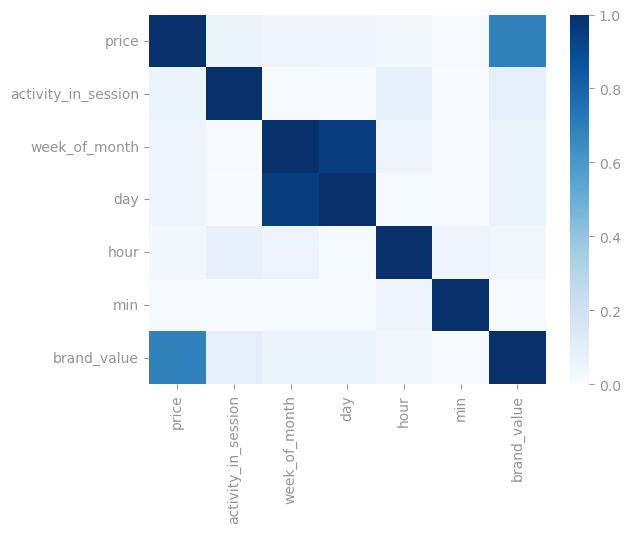

In [19]:
from seaborn import heatmap

variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = df[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
#savefig(f"images/{file_tag}_correlation_analysis.png")
show()

## Insights

# Remove columns that we identified as not needed in the data profiling analysis

## Col min 
- Why we don't need this column

In [ ]:
#drop id columns that are not relevant for the prediction of the class

#df = df.drop(columns=['min'])

#df.head(20)

In [72]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
event_type                 3
category_code_lvl_1       13
category_code_lvl_2       62
category_code_lvl_3      135
brand                   2646
price                  20762
conversion                 2
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                3
dtype: int64


# Save final df from Data profiling into a csv file
- We will use this dataset for the next phase - data preparation

In [39]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_ecom_profiling_vcleaned.csv'

# Salvar o DataFrame em CSV
df.to_csv(filepath, index=False)

In [40]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
category_code_lvl_1       13
category_code_lvl_2       60
price                  24884
is_purchase                2
activity_in_session      120
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                4
brand_value             1661
brand_category          3012
product_category       60657
dtype: int64


In [24]:
# Filtrar os valores da coluna 'product_category' que contêm 'unknown'
unknown_values = df[df['product_category'].str.contains('unknown', na=False)]

# Exibir os resultados
unknown_values.head()


,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day,brand_value,brand_category,product_category


In [77]:
df.shape[0]

69884

# Excel File for encoding mapping

In [41]:
import os
from openpyxl import load_workbook


# Function to append distinct combinations of selected columns into sheets in an Excel file
def append_columns_to_excel(df, columns_dict, output_file):
    """
    Append distinct combinations of selected columns into separate sheets in an existing Excel file,
    with the columns ordered by their names for easier hierarchical encoding and add an empty encoding column.

    Args:
    df (pd.DataFrame): The DataFrame containing the columns to save.
    columns_dict (dict): Dictionary where keys are sheet names, and values are lists of column names to include.
    output_file (str): The path of the Excel file to save the sheets.

    Returns:
    None
    """
    # Check if the file exists and is a valid Excel file
    if os.path.exists(output_file):
        try:
            # Try to load the existing workbook
            with pd.ExcelWriter(output_file, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                writer.book = load_workbook(output_file)
                
                # Loop over each sheet name and corresponding list of columns
                for sheet_name, columns in columns_dict.items():
                    # Check if all the specified columns exist in the DataFrame
                    missing_columns = [col for col in columns if col not in df.columns]
                    if missing_columns:
                        print(f"Warning: The following columns are not found in the DataFrame for sheet '{sheet_name}': {missing_columns}")
                        continue

                    # Get distinct combinations of the selected columns
                    distinct_values = df[columns].drop_duplicates().dropna(how='all')

                    # Convert columns to strings temporarily for sorting to avoid float-string comparison errors
                    distinct_values = distinct_values.astype(str)

                    # Sort distinct values by the specified columns for hierarchical grouping
                    distinct_values.sort_values(by=columns, inplace=True)

                    # Add an empty encoding column for each column in the DataFrame
                    for col in columns:
                        distinct_values[f'{col}_enc'] = pd.NA

                    # Write distinct values to a new sheet named after the sheet_name
                    distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)
                    
        except Exception as e:
            print(f"Error: {e}")
            print("The file might be corrupt or invalid. Creating a new file.")
            # Create a new file if loading fails
            with pd.ExcelWriter(output_file, engine='openpyxl', mode='w') as writer:
                for sheet_name, columns in columns_dict.items():
                    missing_columns = [col for col in columns if col not in df.columns]
                    if missing_columns:
                        print(f"Warning: The following columns are not found in the DataFrame for sheet '{sheet_name}': {missing_columns}")
                        continue

                    # Get distinct combinations of the selected columns
                    distinct_values = df[columns].drop_duplicates().dropna(how='all')

                    # Convert columns to strings temporarily for sorting
                    distinct_values = distinct_values.astype(str)

                    # Sort distinct values by the specified columns for hierarchical grouping
                    distinct_values.sort_values(by=columns, inplace=True)

                    # Add an empty encoding column for each column in the DataFrame
                    for col in columns:
                        distinct_values[f'{col}_enc'] = pd.NA

                    distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)

    else:
        # If the file does not exist, create a new one
        with pd.ExcelWriter(output_file, engine='openpyxl', mode='w') as writer:
            for sheet_name, columns in columns_dict.items():
                missing_columns = [col for col in columns if col not in df.columns]
                if missing_columns:
                    print(f"Warning: The following columns are not found in the DataFrame for sheet '{sheet_name}': {missing_columns}")
                    continue

                # Get distinct combinations of the selected columns
                distinct_values = df[columns].drop_duplicates().dropna(how='all')

                # Convert columns to strings temporarily for sorting
                distinct_values = distinct_values.astype(str)

                # Sort distinct values by the specified columns for hierarchical grouping
                distinct_values.sort_values(by=columns, inplace=True)

                # Add an empty encoding column for each column in the DataFrame
                for col in columns:
                    distinct_values[f'{col}_enc'] = pd.NA

                distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)
                

# Define the groups of columns for hierarchical encoding, grouped by sheet name
columns_to_save = {
    
    'category_code_lvl_1' : ['category_code_lvl_1'],  
    'category_code_lvl_2': ['category_code_lvl_2'],   
    'brand_category': ['brand_category'],
    'product_category': ['product_category'],
    'is_weekend': ['is_weekend']
}

# Save the distinct values combinations of each column group into corresponding sheets
append_columns_to_excel(df, columns_to_save, f'dataset/df_ecom_values_pre_encoding_vcleaned.xlsx')

print("Excel file has been updated successfully.")

Error: property 'book' of 'OpenpyxlWriter' object has no setter
The file might be corrupt or invalid. Creating a new file.
Excel file has been updated successfully.
